## Exploratory Data Analysis

### Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read Data

In [309]:
time_df = pd.read_csv("/Users/james/Desktop/Korea Corona/Data/Korea/Time.csv", encoding = "UTF-8")
time_df.index = pd.to_datetime(time_df["date"])
time_df.drop("date", axis = 1, inplace=True)

time_province_df = pd.read_csv("/Users/james/Desktop/Korea Corona/Data/Korea/TimeProvince.csv", encoding = "UTF-8")
time_province_df.index = pd.to_datetime(time_province_df["date"])
time_province_df.drop("date", axis = 1, inplace=True)

print(time_df.tail())

            time    test  negative  confirmed  released  deceased
date                                                             
2020-04-09     0  494711    468779      10423      6973       204
2020-04-10     0  503051    477303      10450      7117       208
2020-04-11     0  510479    485929      10480      7243       211
2020-04-12     0  514621    490321      10512      7368       214
2020-04-13     0  518743    494815      10537      7447       217


In [301]:
# Check if there is a null value in the dataset
print(all(time_df.isnull().sum() == 0) and 
      all(time_province_df.isnull().sum() == 0))

True


### Plot Cumulative Cases in S.K.

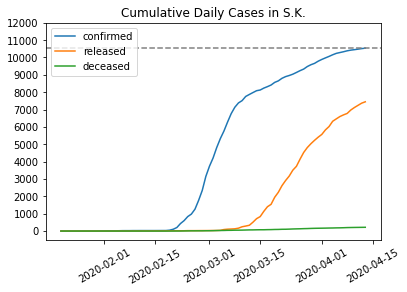

In [302]:
plt.plot(time_df[["confirmed", "released", "deceased"]])
plt.axhline(max(time_df["confirmed"]), color = "grey", linestyle="--")
plt.title("Cumulative Daily Cases in S.K.")
plt.legend(["confirmed", "released", "deceased"], loc = 2)
plt.yticks(np.arange(0, max(time_df["confirmed"]) * 1.2, 1000))
plt.xticks(rotation = 30)
plt.show()

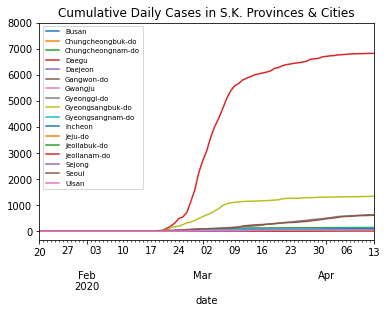

In [303]:
time_province_df.groupby("province")["confirmed"].plot(legend = True)
plt.title("Cumulative Daily Cases in S.K. Provinces & Cities")
plt.legend(fontsize = "x-small")
plt.yticks(np.arange(0, max(time_province_df["confirmed"]) * 1.3, 1000))
plt.show()

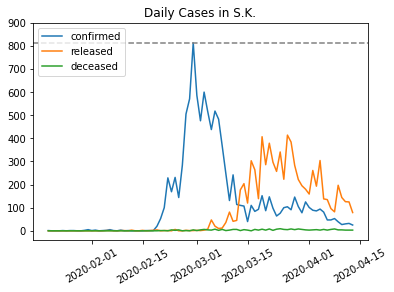

In [304]:
daily_time_df = time_df[["confirmed", "released", "deceased"]].diff().fillna(0)
daily_time_df.iloc[0, 0] = 1

plt.plot(daily_time_df[["confirmed", "released", "deceased"]])
plt.axhline(max(daily_time_df["confirmed"]), color = "grey", linestyle="--")
plt.title("Daily Cases in S.K.")
plt.legend(["confirmed", "released", "deceased"], loc = 2)
plt.yticks(np.arange(0, max(daily_time_df["confirmed"]) * 1.2, 100))
plt.xticks(rotation = 30)
plt.show()

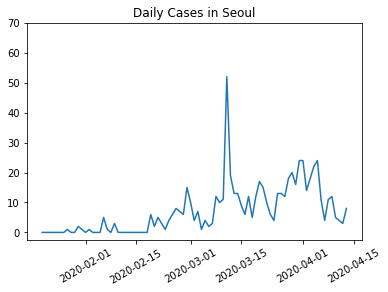

In [305]:
Seoul = time_province_df[time_province_df["province"] == "Seoul"][["confirmed"]].diff().fillna(0)

plt.plot(Seoul)
plt.title("Daily Cases in Seoul")
plt.yticks(np.arange(0, max(Seoul["confirmed"]) * 1.5, 10))
plt.xticks(rotation = 30)
plt.show()

In [299]:
# The percentage of confirmed cases in Seoul
perc_seoul = Seoul.loc["2020-04-01":,] * 100 / daily_time_df.loc["2020-04-01":,["confirmed"]]
print(perc_seoul)

            confirmed
date                 
2020-04-01  23.762376
2020-04-02  15.730337
2020-04-03  20.930233
2020-04-04  23.404255
2020-04-05  29.629630
2020-04-06  23.404255
2020-04-07   8.510638
2020-04-08  20.754717
2020-04-09  30.769231
2020-04-10  18.518519
2020-04-11  13.333333
2020-04-12   9.375000
2020-04-13  32.000000


COVID-19 cases in South korea have dropped sharply since mid-march. <br>
But on average 21% of the daily cases are coming from Seoul.